In [9]:
pickle_file = 'latest_results.pkl'

In [10]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 255

In [11]:
with open('./pickles/%s' % pickle_file, 'rb') as f:
    results_df = pickle.load(f)    

In [12]:
def choose_largest_coefficient_name (coefficients):
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['X_Column'].iloc[0]

def choose_largest_coefficient_weight (coefficients):    
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['abs_weight'].iloc[0]
    
    
results_df['largest_coefficient_column'] = results_df['coefficients'].apply(choose_largest_coefficient_name)
results_df['largest_coefficient_weight'] = results_df['coefficients'].apply(choose_largest_coefficient_weight)

results_df \
    .drop(columns=['X_columns', 'coefficients'])

P      N    TP     FP     TN    FN    TPR    TNR  \
country        cutoff                                                        
United States  5000    3797  15542   870    355  15187  2927  0.229  0.977   
               5000    3797  15542   672     95  15447  3125  0.177  0.994   
               5000    3797  15542   728   1390  14152  3069  0.192  0.911   
               2500    3797  15542   918    365  15177  2879  0.242  0.977   
               2500    3797  15542   629     85  15457  3168  0.166  0.995   
               2500    3797  15542   200    478  15064  3597  0.053  0.969   
               1000    3797  15542   982    394  15148  2815  0.259  0.975   
               1000    3797  15542   523     70  15472  3274  0.138  0.995   
               1000    3797  15542  1305   2473  13069  2492  0.344  0.841   
               500     3797  15542   976    411  15131  2821  0.257  0.974   
               500     3797  15542   567     80  15462  3230  0.149  0.995   
               500     3797  15542   677   1344  14198  3120  0.178  0.914   
               250     3797  15542   983    412  15130  2814  0.259  0.973   
               250     3797  15542   555     77  15465  3242  0.146  0.995   
               250     3797  15542  2003   4546  10996  1794  0.528  0.708   
               100     3797  15542   984    413  15129  2813  0.259  0.973   
               100     3797  15542   543     71  15471  3254  0.143  0.995   
               100     3797  15542   122    489  15053  3675  0.032  0.969   
India          5000    2515  16824   521    118  16706  1994  0.207  0.993   
               5000    2515  16824    99      6  16818  2416  0.039  1.000   
               5000    2515  16824   933   4808  12016  1582  0.371  0.714   
               2500    2515  16824  1022    428  16396  1493  0.406  0.975   
               2500    2515  16824   278     51  16773  2237  0.111  0.997   
               2500    2515  16824    11     32  16792  2504  0.004  0.998   
               1000    2515  16824  1037    435  16389  1478  0.412  0.974   
               1000    2515  16824   269     43  16781  2246  0.107  0.997   
               1000    2515  16824  1031   5558  11266  1484  0.410  0.670   
               500     2515  16824  1031    439  16385  1484  0.410  0.974   
               500     2515  16824   172     30  16794  2343  0.068  0.998   
               500     2515  16824   414   2035  14789  2101  0.165  0.879   
               250     2515  16824  1029    441  16383  1486  0.409  0.974   
               250     2515  16824   197     29  16795  2318  0.078  0.998   
               250     2515  16824  1699   9751   7073   816  0.676  0.420   
               100     2515  16824  1031    439  16385  1484  0.410  0.974   
               100     2515  16824   229     37  16787  2286  0.091  0.998   
               100     2515  16824     1     13  16811  2514  0.000  0.999   
United Kingdom 5000    1149  18190     0      0  18190  1149  0.000  1.000   
               5000    1149  18190     0      0  18190  1149  0.000  1.000   
               5000    1149  18190     0      1  18189  1149  0.000  1.000   
               2500    1149  18190     0      0  18190  1149  0.000  1.000   
               2500    1149  18190     0      0  18190  1149  0.000  1.000   
               2500    1149  18190     0     86  18104  1149  0.000  0.995   
               1000    1149  18190     0      0  18190  1149  0.000  1.000   
               1000    1149  18190     0      0  18190  1149  0.000  1.000   
               1000    1149  18190    88    612  17578  1061  0.077  0.966   
               500     1149  18190     0      0  18190  1149  0.000  1.000   
               500     1149  18190     0      0  18190  1149  0.000  1.000   
               500     1149  18190     0      0  18190  1149  0.000  1.000   
               250     1149  18190     0      0  18190  1149  0.000  1.000   
               250     1149  18190     0      0 

In [17]:
def generate_country_aggregates (runs_for_country):
    total_sims = runs_for_country.shape[0]
    nopes =  runs_for_country.query('TP == 0 and FP == 0').shape[0]
    proportion_of_nopes = round(nopes / total_sims, 3)
    country_proportion = round(runs_for_country.iloc[0]['P'] / (runs_for_country.iloc[0]['P'] + runs_for_country.iloc[0]['N']),3)

    result = pd.Series({
        'total_sims' : total_sims,
        'country_proportion': country_proportion,
        'nopes' : nopes,
        'proportion_of_nopes' : proportion_of_nopes,
    })
    
    return result
    
country_aggregates = results_df \
    .reset_index() \
    .drop(columns=['coefficients', 'X_columns']) \
    .groupby('country') \
    .apply(generate_country_aggregates)

country_aggregates

,total_sims,country_proportion,nopes,proportion_of_nopes
country,,,,
Australia,18.0,0.018,13.0,0.722
Brazil,18.0,0.028,15.0,0.833
Canada,18.0,0.034,16.0,0.889
France,18.0,0.031,14.0,0.778
Germany,18.0,0.061,16.0,0.889
India,18.0,0.130,0.0,0.000
Netherlands,18.0,0.021,14.0,0.778
Poland,18.0,0.020,15.0,0.833
United Kingdom,18.0,0.059,13.0,0.722


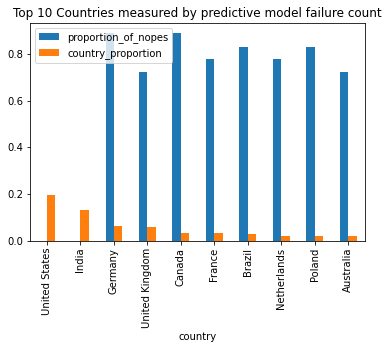

In [18]:
(country_aggregates[['proportion_of_nopes', 'country_proportion']]).sort_values(by='country_proportion', ascending=False).plot(kind="bar");
plt.title("Top 10 Countries measured by predictive model failure count");


In [22]:
non_useless_classifiers = results_df \
    .query('TP > 0 or FP > 0') \
    .drop(columns=['X_columns', 'coefficients'])

In [25]:
non_useless_classifiers.sort_values(by='TPR', ascending=False).head(10)

P      N    TP     FP     TN    FN    TPR    TNR  \
country        cutoff                                                        
Poland         5000     379  18960   277  13163   5797   102  0.731  0.306   
Brazil         5000     549  18790   383  17105   1685   166  0.698  0.090   
India          250     2515  16824  1699   9751   7073   816  0.676  0.420   
United Kingdom 100     1149  18190   715  11643   6547   434  0.622  0.360   
United States  250     3797  15542  2003   4546  10996  1794  0.528  0.708   
India          1000    2515  16824  1037    435  16389  1478  0.412  0.974   
               100     2515  16824  1031    439  16385  1484  0.410  0.974   
               1000    2515  16824  1031   5558  11266  1484  0.410  0.670   
               500     2515  16824  1031    439  16385  1484  0.410  0.974   
               250     2515  16824  1029    441  16383  1486  0.409  0.974   

                         PPV    NPV    ACC         model_type  column_count  \
country        cutoff                                                         
Poland         5000    0.021  0.983  0.314         linear_svm           293   
Brazil         5000    0.022  0.910  0.107         linear_svm           293   
India          250     0.148  0.897  0.454         linear_svm           450   
United Kingdom 100     0.058  0.938  0.376         linear_svm           452   
United States  250     0.306  0.860  0.672         linear_svm           450   
India          1000    0.704  0.917  0.901  linear_regression           422   
               100     0.701  0.917  0.901  linear_regression           452   
               1000    0.156  0.884  0.636         linear_svm           422   
               500     0.701  0.917  0.901  linear_regression           443   
               250     0.700  0.917  0.900  linear_regression           450   

                                      rowset_label          columnset_label  \
country        cutoff                                                         
Poland         5000            full_country_Poland  all_numeric_categerical   
Brazil         5000            full_country_Brazil  all_numeric_categerical   
India          250              full_country_India  all_numeric_categerical   
United Kingdom 100     full_country_United Kingdom  all_numeric_categerical   
United States  250      full_country_United States  all_numeric_categerical   
India          1000             full_country_India  all_numeric_categerical   
               100              full_country_India  all_numeric_categerical   
               1000             full_country_India  all_numeric_categerical   
               500              full_country_India  all_numeric_categerical   
               250              full_country_India  all_numeric_categerical   

                       row_sample_rate  duration  \
country        cutoff                              
Poland         5000                  1    16.254   
Brazil         5000                  1    17.417   
India          250                   1    18.171   
United Kingdom 100                   1    17.773   
United States  250                   1    17.750   
India          1000                  1     0.936   
               100                   1     0.954   
               1000                  1    19.618   
               500                   1     1.078   
               250                   1     0.974   

                                    largest_coefficient_column  \
country        cutoff                                            
Poland         5000                                       None   
Brazil         5000                                       None   
India          250                                        None   
United Kingdom 100                                        None   
United States  250                                        None   
India          1000                      Ethnicity_South Asian   
               100                    

In [26]:
non_useless_classifiers.sort_values(by='PPV', ascending=False).head(10)

P      N   TP  FP     TN    FN    TPR    TNR    PPV  \
country       cutoff                                                           
India         5000    2515  16824   99   6  16818  2416  0.039  1.000  0.943   
United States 100     3797  15542  543  71  15471  3254  0.143  0.995  0.884   
              1000    3797  15542  523  70  15472  3274  0.138  0.995  0.882   
              2500    3797  15542  629  85  15457  3168  0.166  0.995  0.881   
              250     3797  15542  555  77  15465  3242  0.146  0.995  0.878   
              5000    3797  15542  672  95  15447  3125  0.177  0.994  0.876   
              500     3797  15542  567  80  15462  3230  0.149  0.995  0.876   
India         250     2515  16824  197  29  16795  2318  0.078  0.998  0.872   
              1000    2515  16824  269  43  16781  2246  0.107  0.997  0.862   
              100     2515  16824  229  37  16787  2286  0.091  0.998  0.861   

                        NPV    ACC     model_type  column_count  \
country       cutoff                                              
India         5000    0.874  0.875  random_forest           293   
United States 100     0.826  0.828  random_forest           452   
              1000    0.825  0.827  random_forest           422   
              2500    0.830  0.832  random_forest           362   
              250     0.827  0.828  random_forest           450   
              5000    0.832  0.833  random_forest           293   
              500     0.827  0.829  random_forest           443   
India         250     0.879  0.879  random_forest           450   
              1000    0.882  0.882  random_forest           422   
              100     0.880  0.880  random_forest           452   

                                    rowset_label          columnset_label  \
country       cutoff                                                        
India         5000            full_country_India  all_numeric_categerical   
United States 100     full_country_United States  all_numeric_categerical   
              1000    full_country_United States  all_numeric_categerical   
              2500    full_country_United States  all_numeric_categerical   
              250     full_country_United States  all_numeric_categerical   
              5000    full_country_United States  all_numeric_categerical   
              500     full_country_United States  all_numeric_categerical   
India         250             full_country_India  all_numeric_categerical   
              1000            full_country_India  all_numeric_categerical   
              100             full_country_India  all_numeric_categerical   

                      row_sample_rate  duration largest_coefficient_column  \
country       cutoff                                                         
India         5000                  1     7.999                       None   
United States 100                   1    11.386                       None   
              1000                  1    11.065                       None   
              2500                  1    10.486                       None   
              250                   1    11.370                       None   
              5000                  1     9.412                       None   
              500                   1    11.495                       None   
India         250                   1     9.013                       None   
              1000                  1     8.968                       None   
              100                   1     9.080                       None   

                      largest_coefficient_weight  
country       cutoff                              
India         5000                           NaN  
United States 100                            NaN  
              1000                           NaN  
              2500                           NaN  
              250                            NaN  
              5000                      

In [27]:
non_useless_classifiers.sort_values(by='ACC', ascending=False).head(10)

P      N  TP   FP     TN   FN    TPR    TNR    PPV  \
country     cutoff                                                         
Poland      500     379  18960   1   11  18949  378  0.003  0.999  0.083   
Australia   100     355  18984   2  128  18856  353  0.006  0.993  0.015   
            500     355  18984   1  128  18856  354  0.003  0.993  0.008   
Netherlands 100     414  18925   0  125  18800  414  0.000  0.993  0.000   
Australia   1000    355  18984  18  270  18714  337  0.051  0.986  0.062   
Canada      500     658  18681   0    1  18680  658  0.000  1.000  0.000   
Australia   250     355  18984  18  321  18663  337  0.051  0.983  0.053   
Netherlands 5000    414  18925   2  278  18647  412  0.005  0.985  0.007   
Australia   5000    355  18984  19  361  18623  336  0.054  0.981  0.050   
Netherlands 1000    414  18925   2  299  18626  412  0.005  0.984  0.007   

                      NPV    ACC  model_type  column_count  \
country     cutoff                                           
Poland      500     0.980  0.980  linear_svm           443   
Australia   100     0.982  0.975  linear_svm           452   
            500     0.982  0.975  linear_svm           443   
Netherlands 100     0.978  0.972  linear_svm           452   
Australia   1000    0.982  0.969  linear_svm           422   
Canada      500     0.966  0.966  linear_svm           443   
Australia   250     0.982  0.966  linear_svm           450   
Netherlands 5000    0.978  0.964  linear_svm           293   
Australia   5000    0.982  0.964  linear_svm           293   
Netherlands 1000    0.978  0.963  linear_svm           422   

                                rowset_label          columnset_label  \
country     cutoff                                                      
Poland      500          full_country_Poland  all_numeric_categerical   
Australia   100       full_country_Australia  all_numeric_categerical   
            500       full_country_Australia  all_numeric_categerical   
Netherlands 100     full_country_Netherlands  all_numeric_categerical   
Australia   1000      full_country_Australia  all_numeric_categerical   
Canada      500          full_country_Canada  all_numeric_categerical   
Australia   250       full_country_Australia  all_numeric_categerical   
Netherlands 5000    full_country_Netherlands  all_numeric_categerical   
Australia   5000      full_country_Australia  all_numeric_categerical   
Netherlands 1000    full_country_Netherlands  all_numeric_categerical   

                    row_sample_rate  duration largest_coefficient_column  \
country     cutoff                                                         
Poland      500                   1    17.848                       None   
Australia   100                   1    16.775                       None   
            500                   1    17.411                       None   
Netherlands 100                   1    15.233                       None   
Australia   1000                  1    17.055                       None   
Canada      500                   1    18.290                       None   
Australia   250                   1    17.242                       None   
Netherlands 5000                  1    16.644                       None   
Australia   5000                  1    16.036                       None   
Netherlands 1000                  1    16.643                       None   

                    largest_coefficient_weight  
country     cutoff                              
Poland      500                            NaN  
Australia   100                            NaN  
            500                            NaN  
Netherlands 100                            NaN  
Australia   1000                           NaN  
Canada      500                            NaN  
Australia   250                            NaN  
Netherlands 5000                           NaN  
Australia   5000                           NaN  
Netherlands 1000                   

country         cutoff
United States   5000      19339
                5000      19339
                5000      19339
                2500      19339
                2500      19339
                2500      19339
                1000      19339
                1000      19339
                1000      19339
                500       19339
                500       19339
                500       19339
                250       19339
                250       19339
                250       19339
                100       19339
                100       19339
                100       19339
India           5000      19339
                5000      19339
                5000      19339
                2500      19339
                2500      19339
                2500      19339
                1000      19339
                1000      19339
                1000      19339
                500       19339
                500       19339
                500       19339
                2